# Challenge 007 - Data Science for Staking

## Introduction

        I have selected the main goal of the challange to define a variable that gives information about the distribution of the stakes. For the stability of the system it is important to distribute stakes as evenly as possible to avoid centralization because that lead to vulnerability of the system.

## Definition

        I wanted to have one number in every epoch that gives information about the distribution of the stakes. This way the change of this number can be followed through multiple epochs and can give information how the distribution of the stakes have changed and also how evenly are the stakes distributed between validators. The avarage difference from avarage stake in one epoch can give that information.

## Analysis

        In the followings I will analyze the Python script below.

        There is multiple ways to move backwards through the blockchain. I have used the next_epoch_id to move back. It is possible to do that because every block that belongs to epoch T will be identified by the hash of the last block in epoch T-2. Similarly the blocks in epoch T+1 will be identified by the hash of the last block in epoch T-1. That means that in this case the next_epoch_id of a block will point to the last block of the previous epoch and this way we can move backwards on the blockchain epoch by epoch.

        The get_block_final call will return the current block with the next_epoch_id.  With that we can call get_block_by_id and after that the validators call which will return the list of the current validators to the epoch.

        When we have the validators to the given epoch we can calculate the avarage stake that the validators staking. With this information looping through the validators again we can calculate the difference from the avarage stake for each validator and then we can calculate the avarage of the difference from the avarage stake.

        This value will show how evenly or unbalanced are the stakes distributed. If there is one validator where large percentage of the stakes are validated than this will be reflected by the calculated value of the avarege difference. The advantage that we are representing the difference from the avarage with one number is that we can visualize it on a chart and follow through this number on historical data. The chart can be an easy to understand way to follow distribution changes in stakes. Also it has to be considered that at every epoch only those validators will be considered which were actually active validators and only the stakes that are validated by the active validators.

        I have executed the script and visualized the results for shardnet, testnet and mainnet also.

## Shardnet

In [1]:
#!/usr/bin/env python3

import requests
import base64
import sys


RPC_URL = 'https://archival-rpc.shardnet.near.org'


def get_block_by_id(block_id=None):
    p = {
      "jsonrpc": "2.0",
      "id": "dontcare",
      "method": "block",
      "params": {
        "block_id": block_id
      }
    }

    r = requests.post(RPC_URL, json=p)
    val = r.json()['result']['header']

    return {
      "epoch_id": val['epoch_id'],
      "next_epoch_id": val['next_epoch_id'],
      "height": val['height'],
      "prev_height": val['prev_height']
    }
    
def get_block_final():
    p = {
      "jsonrpc": "2.0",
      "id": "dontcare",
      "method": "block",
      "params": {
        "finality": "final"
      }
    }

    r = requests.post(RPC_URL, json=p)
    val = r.json()['result']['header']

    return {
      "epoch_id": val['epoch_id'],
      "next_epoch_id": val['next_epoch_id'],
      "height": val['height'],
      "prev_height": val['prev_height']
    }

def vaidators(block_id=None):
    p = {
      "jsonrpc": "2.0",
      "id": "dontcare",
      "method": "validators",
      "params": [ block_id ]
    }

    r = requests.post(RPC_URL, json=p)
    val = r.json()['result']

    return {
      "epoch_height": val['epoch_height'],
      "epoch_start_height": val['epoch_start_height'],
      "current_validators": val['current_validators']
    }
    
    
# Get current block #
result_array = []

currentBlock  = get_block_final()

loop_next_epoch_id = currentBlock["next_epoch_id"]
loop_epoch_id = currentBlock["epoch_id"]

while loop_epoch_id != "11111111111111111111111111111111":
    currentBlock  = get_block_by_id(loop_next_epoch_id)
#    print(currentBlock)
    vi = vaidators(loop_next_epoch_id)
    epoch_height = vi["epoch_height"];
#    print(vi["epoch_height"])
#    print(vi["epoch_start_height"])
#    print(vi["current_validators"])
    epoch_validators = vi["current_validators"];
    stake_avg = 0
#   Loop through validators to calculate avarage stake
    for x in epoch_validators:
#        print(x["account_id"])
        stake_avg = stake_avg + int(x["stake"])
    stake_avg = stake_avg/len(epoch_validators)
#    print("Stake avg: ")
#    print(stake_avg)
#    print("{:.2f}".format(stake_avg/1000000000000000000000000))
#   Loop through validators to calculate the avarage difference from avarage stake
    stake_avg_diff = 0
    for x in epoch_validators:
        stake_avg_diff = stake_avg_diff + abs(int(x["stake"]) - stake_avg)
    stake_avg_diff = stake_avg_diff/len(epoch_validators)
#    print("Stake avg diff: ")
#    print(stake_avg_diff)
    result = stake_avg_diff/1000000000000000000000000
    result_array.append([epoch_height, result])
    print("{:.2f}".format(result))
    

#    print("---------------------------------------------------")
    loop_next_epoch_id = currentBlock["next_epoch_id"]
    loop_epoch_id = currentBlock["epoch_id"]


result_array

6668.97
6726.97
6856.93
6776.53
7195.43
7261.62
7174.36
7240.51
7216.44
7071.61
7036.40
7161.30
7195.87
7179.19
7257.08
6876.06
6820.14
6777.44
6717.46
6748.73
6738.26
6746.60
6750.91
6748.65
6726.60
6660.28
6657.59
6720.20
6753.98
6750.09
8832.72
8180.79
8210.94
6516.53
6526.40
6484.41
6414.68
6386.10
6404.24
6352.42
6291.31
6314.80
6315.36
6332.33
6296.61
6251.35
6199.43
6257.58
6274.77
6293.25
6243.07
6208.87
6241.38
6039.89
6016.33
7183.66
7079.46
5855.39
5877.08
7152.00
7134.92
7138.87
7129.79
7093.64
7127.76
7121.24
7148.01
7087.72
7085.21
7028.99
7072.84
7101.83
7078.16
7066.40
7085.92
7085.79
7052.57
7052.66
7075.52
7064.49
7966.22
7038.69
5752.39
5847.76
7163.95
7174.04
7147.03
7172.35
7189.79
5898.93
5822.87
7217.47
7260.42
5802.95
5737.88
7248.48
7244.83
5803.22
5721.07
7319.53
7301.53
5744.52
5733.21
7327.58
7307.19
5783.56
6136.58
8343.41
8125.75
15247.36
15232.60
17719.39
17716.56
16735.16
12144.06
24633.29
24635.16
0.00
0.00


[[118, 6668.971947884898],
 [117, 6726.970708519899],
 [116, 6856.92501596038],
 [115, 6776.530274890872],
 [114, 7195.42706428566],
 [113, 7261.621171129637],
 [112, 7174.360421729974],
 [111, 7240.511431225918],
 [110, 7216.439399633634],
 [109, 7071.614530818956],
 [108, 7036.396752481521],
 [107, 7161.302405675213],
 [106, 7195.87105772899],
 [105, 7179.19343249633],
 [104, 7257.084916581855],
 [103, 6876.062248872792],
 [102, 6820.142224929082],
 [101, 6777.439381204003],
 [100, 6717.462506186409],
 [99, 6748.729638383334],
 [98, 6738.258025504398],
 [97, 6746.599540475315],
 [96, 6750.907090058909],
 [95, 6748.649678590378],
 [94, 6726.595467515051],
 [93, 6660.282794392979],
 [92, 6657.586611953849],
 [91, 6720.202582398417],
 [90, 6753.9774663699045],
 [89, 6750.085005712577],
 [88, 8832.715514116859],
 [87, 8180.789020766762],
 [86, 8210.943081421985],
 [85, 6516.529152966234],
 [84, 6526.399636689051],
 [83, 6484.408660845446],
 [82, 6414.6775780757425],
 [81, 6386.1049264782

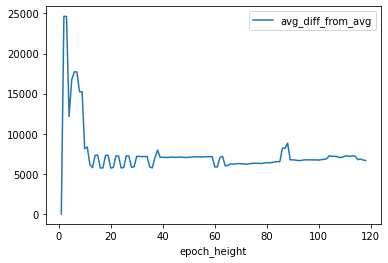

In [3]:
import pandas as pd
import numpy as np

#df = pd.read(Out[25])
numpy_data = np.array(Out[1])
#numpy_data = np.array([[1, 2], [3, 4]])
df = pd.DataFrame(data=numpy_data, columns=["epoch_height", "avg_diff_from_avg"])

type(df)


%matplotlib inline

import matplotlib.pyplot as plt
df.plot(x="epoch_height", y=["avg_diff_from_avg"])
plt.show()

        On the chart it is displayed how the avarage difference from avarage stake have changed during the epochs. We can see that after the initial spike there is a consolidation period and it have settled around 6700-7200 NEAR. That is how much is the difference in case of an avarge validator. If by stake distributinon changes this value can lowered that will lead to more evenly distributed stakes.

# Testnet

In [4]:
#!/usr/bin/env python3

import requests
import base64
import sys


RPC_URL = 'https://archival-rpc.testnet.near.org'


def get_block_by_id(block_id=None):
    p = {
      "jsonrpc": "2.0",
      "id": "dontcare",
      "method": "block",
      "params": {
        "block_id": block_id
      }
    }

    r = requests.post(RPC_URL, json=p)
    val = r.json()['result']['header']

    return {
      "epoch_id": val['epoch_id'],
      "next_epoch_id": val['next_epoch_id'],
      "height": val['height'],
      "prev_height": val['prev_height']
    }
    
def get_block_final():
    p = {
      "jsonrpc": "2.0",
      "id": "dontcare",
      "method": "block",
      "params": {
        "finality": "final"
      }
    }

    r = requests.post(RPC_URL, json=p)
    val = r.json()['result']['header']

    return {
      "epoch_id": val['epoch_id'],
      "next_epoch_id": val['next_epoch_id'],
      "height": val['height'],
      "prev_height": val['prev_height']
    }

def vaidators(block_id=None):
    p = {
      "jsonrpc": "2.0",
      "id": "dontcare",
      "method": "validators",
      "params": [ block_id ]
    }

    r = requests.post(RPC_URL, json=p)
    val = r.json()['result']

    return {
      "epoch_height": val['epoch_height'],
      "epoch_start_height": val['epoch_start_height'],
      "current_validators": val['current_validators']
    }
    
    
# Get current block #
result_array = []

currentBlock  = get_block_final()

loop_next_epoch_id = currentBlock["next_epoch_id"]
loop_epoch_id = currentBlock["epoch_id"]

while loop_epoch_id != "11111111111111111111111111111111":
    currentBlock  = get_block_by_id(loop_next_epoch_id)
#    print(currentBlock)
    vi = vaidators(loop_next_epoch_id)
    epoch_height = vi["epoch_height"];
    print(vi["epoch_height"])
#    print(vi["epoch_start_height"])
#    print(vi["current_validators"])
    epoch_validators = vi["current_validators"];
    stake_avg = 0
#   Loop through validators to calculate avarage stake
    for x in epoch_validators:
#        print(x["account_id"])
        stake_avg = stake_avg + int(x["stake"])
    stake_avg = stake_avg/len(epoch_validators)
#    print("Stake avg: ")
#    print(stake_avg)
#    print("{:.2f}".format(stake_avg/1000000000000000000000000))
#   Loop through validators to calculate the avarage difference from avarage stake
    stake_avg_diff = 0
    for x in epoch_validators:
        stake_avg_diff = stake_avg_diff + abs(int(x["stake"]) - stake_avg)
    stake_avg_diff = stake_avg_diff/len(epoch_validators)
#    print("Stake avg diff: ")
#    print(stake_avg_diff)
    result = stake_avg_diff/1000000000000000000000000
    result_array.append([epoch_height, result])
    print("{:.2f}".format(result))
    

#    print("---------------------------------------------------")
    loop_next_epoch_id = currentBlock["next_epoch_id"]
    loop_epoch_id = currentBlock["epoch_id"]


result_array

1274
5365138.87
1273
5371257.84
1272
5266599.91
1271
5282677.87
1270
4702486.08
1269
4683631.57
1268
4831932.14
1267
4833238.92
1266
4488563.56
1265
4341886.06
1264
4604624.58
1263
4816341.78
1262
4362790.02
1261
4245999.77
1260
4665802.23
1259
4801431.07
1258
4539796.54
1257
4414202.88
1256
4652846.02
1255
4863950.70
1254
4707854.56
1253
4464240.79
1252
4527422.64
1251
4632364.55
1250
4484513.61
1249
4482849.62
1248
4616984.38
1247
4540712.44
1246
4670562.79
1245
4487053.22
1244
4553087.02
1243
4670691.79
1242
4396830.01
1241
4422851.43
1240
4548718.77
1239
2967790.43
1238
2921454.06
1237
2854475.38
1236
2891002.81
1235
3042125.10
1234
3036365.28
1233
2919721.74
1232
2878503.71
1231
2938146.61
1230
2892680.54
1229
2733426.62
1228
2756491.10
1227
2904193.65
1226
2803159.76
1225
2687070.80
1224
2903916.63
1223
3071803.44
1222
2826031.75
1221
2777813.97
1220
2626038.58
1219
2689363.40
1218
2687987.33
1217
2624628.17
1216
2493058.25
1215
2716111.75
1214
3641196.72
1213
3417253.04
1212
345

743
1074491.53
742
1128446.00
741
1245874.46
740
1207430.70
739
1155274.00
738
882802.52
737
886515.29
736
924135.72
735
830637.02
734
917921.50
733
1012743.66
732
1203262.04
731
1145039.32
730
1230760.56
729
1354231.39
728
1348503.30
727
1181901.69
726
990668.24
725
1151242.97
724
1417574.80
723
1005461.67
722
981667.45
721
976620.40
720
1031253.76
719
1120602.91
718
1117402.96
717
1143542.45
716
1323456.83
715
1442078.95
714
1417468.03
713
1319724.46
712
1405709.41
711
1420028.02
710
1287621.00
709
1300754.22
708
1415622.80
707
1449018.66
706
1320922.60
705
1290234.40
704
1442492.03
703
1923524.56
702
1719625.30
701
1299915.91
700
1438717.58
699
1946790.72
698
1945188.23
697
1578615.36
696
1463980.29
695
1353502.30
694
1465841.81
693
1464633.24
692
1499313.34
691
1772744.88
690
1771347.12
689
1477513.07
688
1476350.30
687
1474990.51
686
1474009.17
685
1510330.74
684
1351994.53
683
1334056.89
682
1466564.19
681
1465331.02
680
1463800.85
679
1329068.70
678
1461724.99
677
1460413.18
676

196
2757084.21
195
3056648.42
194
3116428.27
193
2745959.09
192
2742474.69
191
3104916.39
190
3100771.65
189
2789747.11
188
2836341.13
187
3137740.44
186
3133411.97
185
2768379.81
184
2764803.26
183
3121498.60
182
3117166.67
181
2801215.17
180
2797522.36
179
3140653.10
178
3136341.44
177
2836996.29
176
2781846.49
175
3078296.57
174
3119941.85
173
2821098.96
172
2817336.66
171
3107823.68
170
3098828.99
169
2846402.61
168
2842514.43
167
3086571.34
166
3046318.07
165
2742234.42
164
2738596.52
163
3034444.40
162
3030191.03
161
2726871.87
160
2723230.58
159
3018422.10
158
3014222.49
157
2711539.08
156
2707882.18
155
3002365.75
154
3036763.49
153
2740998.01
152
2692351.66
151
2986216.74
150
2981972.66
149
2680627.91
148
2676990.67
147
2970425.28
146
2966208.97
145
2665524.73
144
2661892.30
143
2954569.12
142
2950316.56
141
2650204.36
140
2646551.33
139
2938476.66
138
2934273.76
137
2634777.49
136
2631089.05
135
2966192.71
134
2918082.45
133
2619263.00
132
2566392.49
131
2855969.34
130
290213

[[1274, 5365138.87001305],
 [1273, 5371257.841694369],
 [1272, 5266599.910487214],
 [1271, 5282677.866874925],
 [1270, 4702486.077300049],
 [1269, 4683631.568418327],
 [1268, 4831932.137614888],
 [1267, 4833238.915245677],
 [1266, 4488563.557709629],
 [1265, 4341886.056787747],
 [1264, 4604624.578563281],
 [1263, 4816341.784538001],
 [1262, 4362790.020360236],
 [1261, 4245999.767402786],
 [1260, 4665802.2294185385],
 [1259, 4801431.06679178],
 [1258, 4539796.5374601595],
 [1257, 4414202.879077502],
 [1256, 4652846.01796996],
 [1255, 4863950.70003399],
 [1254, 4707854.558605635],
 [1253, 4464240.791841685],
 [1252, 4527422.638143359],
 [1251, 4632364.553404498],
 [1250, 4484513.614209556],
 [1249, 4482849.617176231],
 [1248, 4616984.376652274],
 [1247, 4540712.439968335],
 [1246, 4670562.786025871],
 [1245, 4487053.2177048465],
 [1244, 4553087.022120257],
 [1243, 4670691.7918639425],
 [1242, 4396830.012022389],
 [1241, 4422851.428228671],
 [1240, 4548718.768596082],
 [1239, 2967790.4284

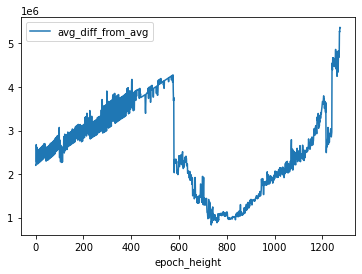

In [5]:
import pandas as pd
import numpy as np

#df = pd.read(Out[25])
numpy_data = np.array(Out[4])
#numpy_data = np.array([[1, 2], [3, 4]])
df = pd.DataFrame(data=numpy_data, columns=["epoch_height", "avg_diff_from_avg"])

type(df)


%matplotlib inline

import matplotlib.pyplot as plt
df.plot(x="epoch_height", y=["avg_diff_from_avg"])
plt.show()

        On the testnet we can see completly different stake distribution that we have seen on shardnet. In this case we can see a slow steady increase in the avarage difference from avarage value until the 600th epoch. Then a big fall followed by the consolidation period and then a big spike. That means that now is the stake distribution is the most unbalanced since the testnet started.

## Mainnet

In [6]:
#!/usr/bin/env python3

import requests
import base64
import sys


RPC_URL = 'https://archival-rpc.mainnet.near.org'


def get_block_by_id(block_id=None):
    p = {
      "jsonrpc": "2.0",
      "id": "dontcare",
      "method": "block",
      "params": {
        "block_id": block_id
      }
    }

    r = requests.post(RPC_URL, json=p)
    val = r.json()['result']['header']

    return {
      "epoch_id": val['epoch_id'],
      "next_epoch_id": val['next_epoch_id'],
      "height": val['height'],
      "prev_height": val['prev_height']
    }
    
def get_block_final():
    p = {
      "jsonrpc": "2.0",
      "id": "dontcare",
      "method": "block",
      "params": {
        "finality": "final"
      }
    }

    r = requests.post(RPC_URL, json=p)
    val = r.json()['result']['header']

    return {
      "epoch_id": val['epoch_id'],
      "next_epoch_id": val['next_epoch_id'],
      "height": val['height'],
      "prev_height": val['prev_height']
    }

def vaidators(block_id=None):
    p = {
      "jsonrpc": "2.0",
      "id": "dontcare",
      "method": "validators",
      "params": [ block_id ]
    }

    r = requests.post(RPC_URL, json=p)
    val = r.json()['result']

    return {
      "epoch_height": val['epoch_height'],
      "epoch_start_height": val['epoch_start_height'],
      "current_validators": val['current_validators']
    }
    
    
# Get current block #
result_array = []

currentBlock  = get_block_final()

loop_next_epoch_id = currentBlock["next_epoch_id"]
loop_epoch_id = currentBlock["epoch_id"]

while loop_epoch_id != "11111111111111111111111111111111":
    currentBlock  = get_block_by_id(loop_next_epoch_id)
#    print(currentBlock)
    vi = vaidators(loop_next_epoch_id)
    epoch_height = vi["epoch_height"];
    print(vi["epoch_height"])
#    print(vi["epoch_start_height"])
#    print(vi["current_validators"])
    epoch_validators = vi["current_validators"];
    stake_avg = 0
#   Loop through validators to calculate avarage stake
    for x in epoch_validators:
#        print(x["account_id"])
        stake_avg = stake_avg + int(x["stake"])
    stake_avg = stake_avg/len(epoch_validators)
#    print("Stake avg: ")
#    print(stake_avg)
#    print("{:.2f}".format(stake_avg/1000000000000000000000000))
#   Loop through validators to calculate the avarage difference from avarage stake
    stake_avg_diff = 0
    for x in epoch_validators:
        stake_avg_diff = stake_avg_diff + abs(int(x["stake"]) - stake_avg)
    stake_avg_diff = stake_avg_diff/len(epoch_validators)
#    print("Stake avg diff: ")
#    print(stake_avg_diff)
    result = stake_avg_diff/1000000000000000000000000
    result_array.append([epoch_height, result])
    print("{:.2f}".format(result))
    

#    print("---------------------------------------------------")
    loop_next_epoch_id = currentBlock["next_epoch_id"]
    loop_epoch_id = currentBlock["epoch_id"]


result_array

1436
3744344.44
1435
3744644.74
1434
3744150.87
1433
3742645.56
1432
3745744.05
1431
3769566.38
1430
3768709.33
1429
3746284.61
1428
3745208.21
1427
3772672.13
1426
3773157.88
1425
3779372.86
1424
3778529.64
1423
3758593.98
1422
3758311.68
1421
3740610.11
1420
3739892.86
1419
3745303.22
1418
3742878.42
1417
3732054.26
1416
3730673.91
1415
3756206.03
1414
3735715.32
1413
3756489.34
1412
3742829.51
1411
3742834.96
1410
3742481.13
1409
3740510.03
1408
3738038.21
1407
3734162.23
1406
3733393.53
1405
3732735.84
1404
3731101.90
1403
3731198.98
1402
3734243.66
1401
3730537.33
1400
3728516.72
1399
3723684.58
1398
3710175.88
1397
3709923.40
1396
3711931.93
1395
3709692.83
1394
3716868.47
1393
3715453.42
1392
3717690.96
1391
3708322.71
1390
3693086.75
1389
3691091.81
1388
3690608.26
1387
3689943.02
1386
3689252.10
1385
3686311.18
1384
3685762.62
1383
3683622.61
1382
3681850.26
1381
3681222.60
1380
3677412.59
1379
3699269.48
1378
3699071.64
1377
3700009.29
1376
3684270.16
1375
3519108.91
1374
370

917
3779760.96
916
3762942.61
915
3762457.70
914
3759994.99
913
3762854.89
912
3724722.75
911
3725072.80
910
3723732.43
909
3710624.56
908
3703917.80
907
3702218.29
906
3701918.18
905
3716264.97
904
3715144.57
903
3700687.55
902
3692471.49
901
3692794.06
900
3686495.06
899
3682867.36
898
3682601.45
897
3716061.30
896
3693790.68
895
3691298.29
894
3789728.47
893
3844793.58
892
3685589.09
891
3669258.92
890
3674515.00
889
3677859.65
888
3685446.90
887
3683603.34
886
3681582.07
885
3678768.19
884
3681354.48
883
3681997.62
882
3685154.96
881
3655807.27
880
3649271.69
879
3686610.29
878
3697688.19
877
3702065.93
876
3419078.50
875
3414406.31
874
3413666.10
873
3415059.44
872
3406653.38
871
3432124.75
870
3444104.43
869
3440962.03
868
3420951.39
867
3457670.43
866
3448879.22
865
3461677.42
864
3464807.77
863
3475414.27
862
3502942.97
861
3502209.09
860
3503284.81
859
3499932.26
858
3506287.10
857
3490750.95
856
3490430.80
855
3490870.25
854
3520547.73
853
3550887.91
852
3561049.21
851
355130

370
2305132.97
369
2303896.11
368
2294123.64
367
2302217.25
366
2297620.59
365
2304188.69
364
2302420.04
363
1946327.78
362
1941848.79
361
1950484.67
360
1933446.15
359
1946381.97
358
1959796.12
357
1973151.14
356
1963645.49
355
1954676.07
354
1983727.68
353
1988427.35
352
1963992.29
351
1962284.60
350
2002355.36
349
1972578.79
348
2012313.07
347
1990695.88
346
1994458.01
345
2000247.17
344
1994412.92
343
1993221.04
342
1994722.93
341
1994199.75
340
1993027.49
339
1992492.38
338
1991975.06
337
1990963.07
336
2000641.89
335
1994583.68
334
1985991.37
333
1986533.96
332
2016090.78
331
2038364.07
330
2001365.38
329
2023895.48
328
1995809.67
327
1988694.43
326
2009660.13
325
1985681.38
324
1967150.27
323
1961957.26
322
1955842.01
321
1966388.23
320
1968826.79
319
1982966.19
318
1989083.29
317
2005274.13
316
2006002.57
315
2025598.94
314
1973104.04
313
1925544.58
312
1925014.44
311
1976229.09
310
2086690.10
309
2115485.94
308
1949507.05
307
1951168.11
306
1949585.52
305
1946193.33
304
233656

[[1436, 3744344.437986902],
 [1435, 3744644.7449967996],
 [1434, 3744150.8669990227],
 [1433, 3742645.560878236],
 [1432, 3745744.052817806],
 [1431, 3769566.379761896],
 [1430, 3768709.3302997877],
 [1429, 3746284.606738197],
 [1428, 3745208.2141604377],
 [1427, 3772672.1345575624],
 [1426, 3773157.8822746333],
 [1425, 3779372.855494046],
 [1424, 3778529.6402183417],
 [1423, 3758593.981578209],
 [1422, 3758311.679493974],
 [1421, 3740610.112146837],
 [1420, 3739892.8598428266],
 [1419, 3745303.219115083],
 [1418, 3742878.4178315112],
 [1417, 3732054.2557937913],
 [1416, 3730673.9076891686],
 [1415, 3756206.0304587153],
 [1414, 3735715.315709906],
 [1413, 3756489.3379981546],
 [1412, 3742829.513180768],
 [1411, 3742834.9649990858],
 [1410, 3742481.1321044033],
 [1409, 3740510.0346748447],
 [1408, 3738038.205233256],
 [1407, 3734162.2289298475],
 [1406, 3733393.5266168406],
 [1405, 3732735.8374756454],
 [1404, 3731101.9005325967],
 [1403, 3731198.9819195364],
 [1402, 3734243.660772077],

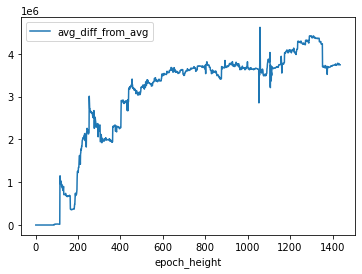

In [7]:
import pandas as pd
import numpy as np

#df = pd.read(Out[25])
numpy_data = np.array(Out[6])
#numpy_data = np.array([[1, 2], [3, 4]])
df = pd.DataFrame(data=numpy_data, columns=["epoch_height", "avg_diff_from_avg"])

type(df)


%matplotlib inline

import matplotlib.pyplot as plt
df.plot(x="epoch_height", y=["avg_diff_from_avg"])
plt.show()

        At the mainnet util the 300th epoch we can see two big spikes followed by a consolidation period where for 600 epoch from 400 to 1000 the value stays pretty stable. After a steady increase from epoch 1200 until epoch 1350 the value has fall back its previous level.

## Analysis

        It is interresting to see how different are the charts for all of the networks. On shardnet and mainnet it can be seen some kind of consolidation and the values can stay at the same level for long period of times. In testnet it is just the opposite, we can see big sharp spikes and falls. On longterm if the values can stay on the same leves and not have big spikes can be evaluated positively because  considering that the validators are continously changing in the epochs but stake distribution stays the same. On the other hand the longterm goal should be to decrease this value because that will mean a more even stake distribution.
        The avarage difference from the avarege stake value/chart can be an easy way to follow how robust is the system. Also it can serve as a basis for different metrics. Now only the stakes were considered. But also if the APY and comission would be considered those charts could give information about the avarege cost/performance of the validators.